# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [89]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline 
#inline namest notebook

# naložimo razpredelnico, s katero bomo delali
import os.path
pot_do_podatkov = os.path.join("../../", "02-zajem-podatkov", "predavanja", "obdelani-podatki", "filmi.csv")

filmi = pd.read_csv(pot_do_podatkov)

#abs path ker neki ni delal prej: Users/alanmarinic/Documents_Mac/FMF/2.letnik/PRO1/Git_repozitorij/programiranje-1/02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv

Poglejmo si podatke.

In [62]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [63]:
filmi.sort_values("ocena", ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9902,7286456,Joker,122,2019,9.5,70.0,14789,NaN,R,An original standalone origin story of the ico...
4196,252487,Hababam Sinifi,87,1975,9.4,NaN,34256,NaN,NaN,"Lazy, uneducated students share a very close b..."
9946,7738784,Peranbu,147,2018,9.3,NaN,10415,NaN,NaN,"A single father tries to raise his daughter, w..."
2830,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2136999,28341469.0,R,Two imprisoned men bond over a number of years...
8284,2170667,Wheels,115,2014,9.3,NaN,17371,NaN,R,Two suicidal paraplegic junkies hustle their w...
...,...,...,...,...,...,...,...,...,...,...
9718,5988370,Reis,108,2017,1.5,NaN,71969,NaN,NaN,A drama about the early life of Recep Tayyip E...
9726,6038600,Smolensk,120,2016,1.4,NaN,7417,NaN,NaN,Inspired by true events of 2010 Polish Air For...
9237,4009460,Saving Christmas,79,2014,1.4,18.0,14365,2783970.0,PG,His annual Christmas party faltering thanks to...
9354,4458206,Kod Adi K.O.Z.,114,2015,1.4,NaN,26817,NaN,NaN,A look at the 17-25 December 2013 corruption s...


Poberite stolpec ocen.

In [64]:
filmi[["ocena"]]
ocene = filmi["ocena"]
ocene

0       6.4
1       7.8
2       7.4
3       8.1
4       8.3
       ... 
9995    6.2
9996    4.3
9997    7.2
9998    5.6
9999    8.3
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [ ]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']))

Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [65]:
zaokrozene = round(ocene)
zaokrozene

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    4.0
9997    7.0
9998    6.0
9999    8.0
Name: ocena, Length: 10000, dtype: float64

Vidimo, da zaokrožene ocene ustrzajo ...

Dodajte zaokrožene vrednosti v podatke.

In [66]:
filmi["zaokrozene ocene"] = zaokrozene
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [67]:
filmi = filmi.drop(columns="zaokrozene ocene")
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [78]:
filmi_light = filmi[["glasovi", "naslov", "leto"]]
filmi_light["zaokrozene ocene"] = zaokrozene
filmi_light

<ipython-input-78-1935171c5324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmi_light["zaokrozene ocene"] = zaokrozene


,glasovi,naslov,leto,zaokrozene ocene
0,20737,The Birth of a Nation,1915,6.0
1,13031,Intolerance: Love's Struggle Throughout the Ages,1916,8.0
2,8700,Broken Blossoms or The Yellow Man and the Girl,1919,7.0
3,50866,Das Cabinet des Dr. Caligari,1920,8.0
4,100210,The Kid,1921,8.0
...,...,...,...,...
9995,7319,Between Two Ferns: The Movie,2019,6.0
9996,13308,Secret Obsession,2019,4.0
9997,96998,Black Mirror: Bandersnatch,2018,7.0
9998,7389,Falling Inn Love,2019,6.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [79]:
prej_mask = filmi["leto"] < 1930
potem_mask = filmi["leto"] > 2017
filmi[prej_mask | potem_mask]
# | :=bitni ali

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [80]:
filmi.head(250).tail(50)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
200,37635,Dead of Night,103,1945,7.7,NaN,9767,NaN,NaN,Architect Walter Craig (Mervyn Johns) senses i...,8.0
201,37638,Detour,68,1945,7.4,NaN,13081,16172.0,NaN,Chance events trap hitch-hiker Al Roberts in a...,7.0
202,37674,Les enfants du paradis,189,1945,8.4,NaN,16983,NaN,NaN,The theatrical life of a beautiful courtesan a...,8.0
203,37800,I Know Where I'm Going!,91,1945,7.5,NaN,7222,NaN,NaN,A young Englishwoman goes to the Hebrides to m...,8.0
204,37824,Ivan Groznyy,103,1944,7.8,NaN,8301,NaN,NaN,"During the early part of his reign, Ivan the T...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
245,40068,Bud Abbott Lou Costello Meet Frankenstein,83,1948,7.5,NaN,13345,4796000.0,NaN,Two hapless freight handlers find themselves e...,8.0
246,40160,The Big Clock,95,1948,7.7,NaN,7150,NaN,NaN,"After murdering someone, a magazine tycoon tri...",8.0
247,40202,Call Northside 777,112,1948,7.4,NaN,7341,NaN,NaN,Chicago reporter P.J. McNeal re-opens a ten ye...,7.0
248,40308,Easter Parade,103,1948,7.4,NaN,7850,9033920.0,NaN,A nightclub performer hires a naive chorus gir...,7.0


In [81]:
def je_kratek_naslov(naslov, max_besed=2):
    return len(naslov.split()) <= max_besed

#$f_a(x)$
#def max_x_bsesed(x):
#    return lambda a: je_kratek_naslov(a, x)

dobra_ocena = filmi["ocena"] > 8
kratki_naslovi = filmi["naslov"].apply(je_kratek_naslov)

filmi[dobra_ocena & kratki_naslovi]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,100,1921,8.1,NaN,9106,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
14,15864,Zlata mrzlica,95,1925,8.2,NaN,91091,5450000.0,NaN,A prospector goes to the Klondike in search of...,8.0
15,15881,Greed,140,1924,8.1,NaN,8374,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9973,8239946,Tumbbad,104,2018,8.2,NaN,15677,NaN,NaN,A mythological story about a goddess who creat...,8.0
9976,8267604,Capharnaüm,126,2018,8.4,75.0,27308,1661096.0,R,While serving a five-year sentence for a viole...,8.0
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...,8.0
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...,9.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [86]:
filmi["zaokrozene ocene"] = zaokrozene
filmi
po_ocenah = filmi.groupby("zaokrozene ocene").size()
po_ocenah

zaokrozene ocene
1.0        4
2.0       42
3.0       52
4.0      230
5.0      853
6.0     3193
7.0     3521
8.0     2034
9.0       70
10.0       1
dtype: int64

Naredite stolpični diagram teh podatkov.

<IPython.core.display.Javascript object>


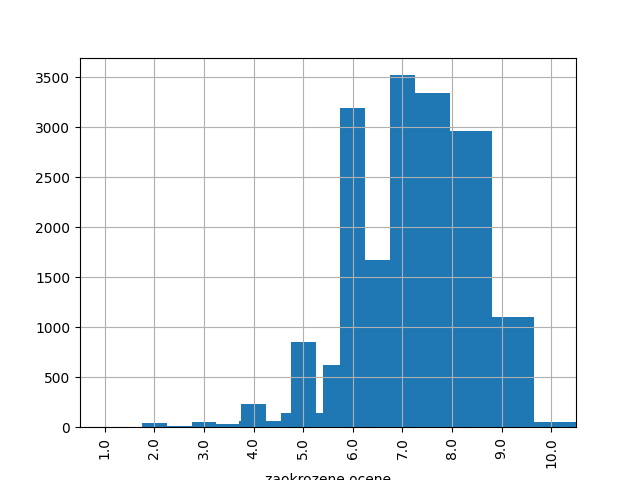

<AxesSubplot:xlabel='zaokrozene ocene'>

In [87]:
po_ocenah.plot.bar()  #xticks

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

<AxesSubplot:>

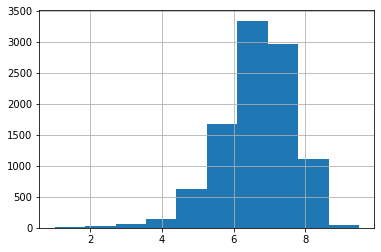

In [90]:
filmi["ocena"].hist()

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto'>

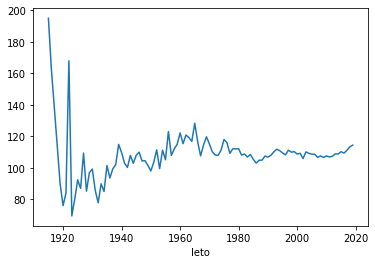

In [91]:
filmi_po_letu = filmi.groupby("leto")
povprecja_po_letu = filmi_po_letu.mean()
povprecna_dolzina = povprecja_po_letu["dolzina"]
povprecna_dolzina.plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

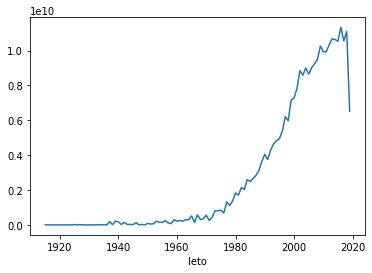

In [92]:
filmi_po_letu.sum()["zasluzek"].plot()